In [1]:
import os
import numpy as np
import pandas as pd
import data
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
%matplotlib inline

from keras import models

plt.rcParams['figure.figsize'] = (12, 12)

Using TensorFlow backend.


## Single Hidden Layer Fully Connected Network Predictions

In [2]:
model_path = 'results/single_hidden_layer/model.h5' #set this
model = models.load_model(model_path)

print(model.summary())
train, X_test = data.data()

train_prediction = model.predict(train[0]) 
test_prediction = model.predict(X_test) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
Total params: 925,130
Trainable params: 924,930
Non-trainable params: 200
_________________________________________________________________
None
left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y

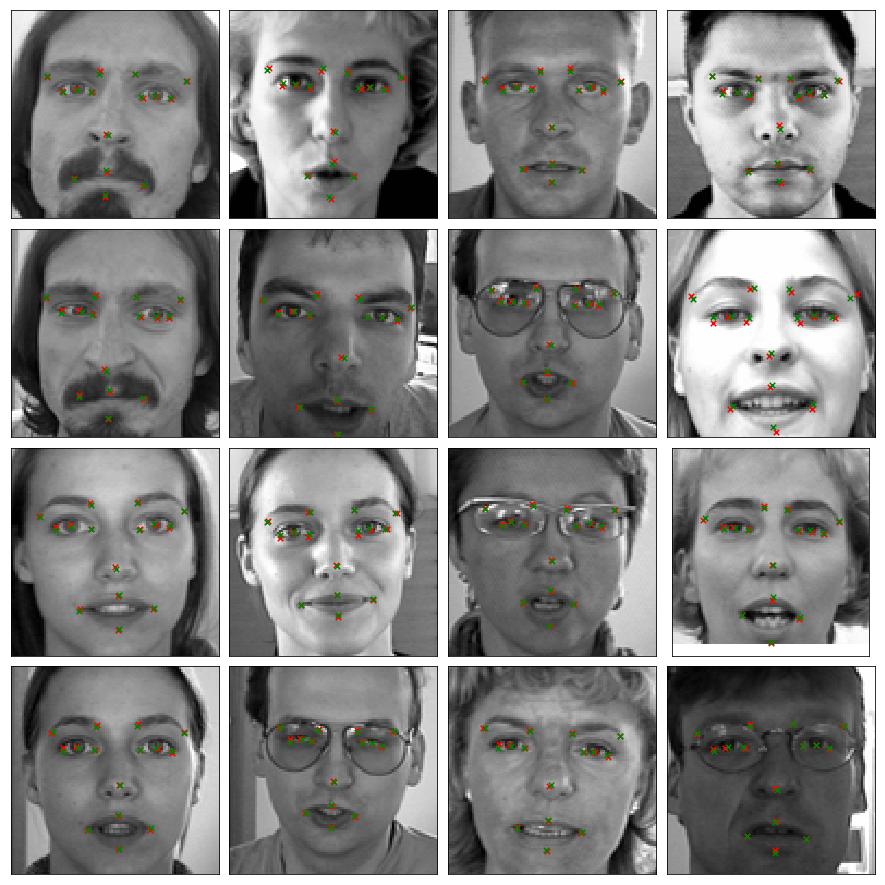

In [11]:
def plot_sample(x, y, axis, y_true=None):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=30, color="red")
    if y_true is not None:
        axis.scatter(y_true[0::2] * 48 + 48, y_true[1::2] * 48 + 48, marker='x', s=30, color="green")

fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(train[0][i], train_prediction[i], ax, train[1][i])

plt.show()

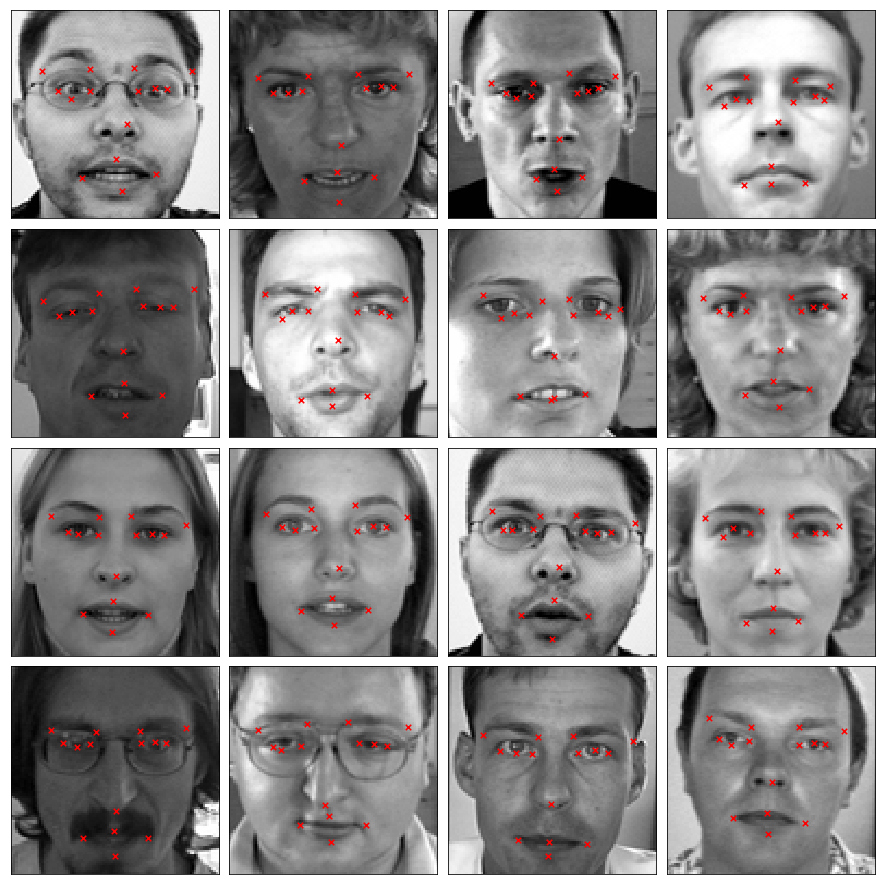

In [4]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], test_prediction[i], ax)

plt.show()

## Three Layer ConvNet Predictions

In [5]:
model_path = 'results/three_layer_convolution/model.h5' #set this
model = models.load_model(model_path)

print(model.summary())
train, X_test = data.data(reshape=True)

train_prediction = model.predict(train[0]) 
test_prediction = model.predict(X_test) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 64)        0         
__________

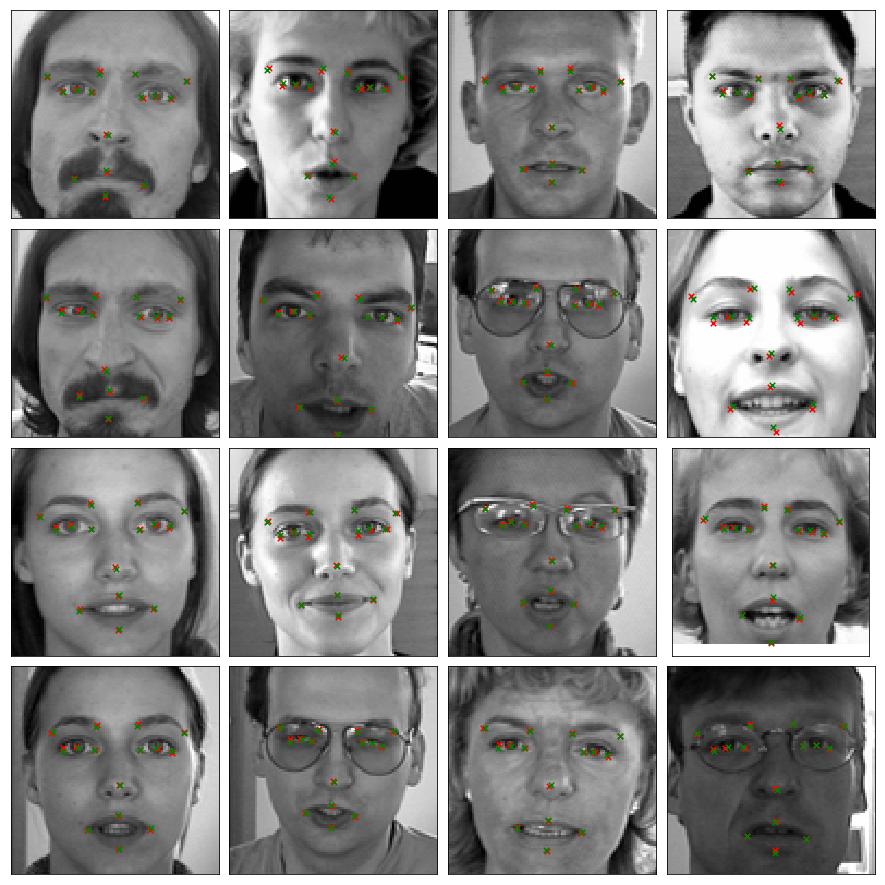

In [13]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(train[0][i], train_prediction[i], ax, train[1][i])

plt.show()

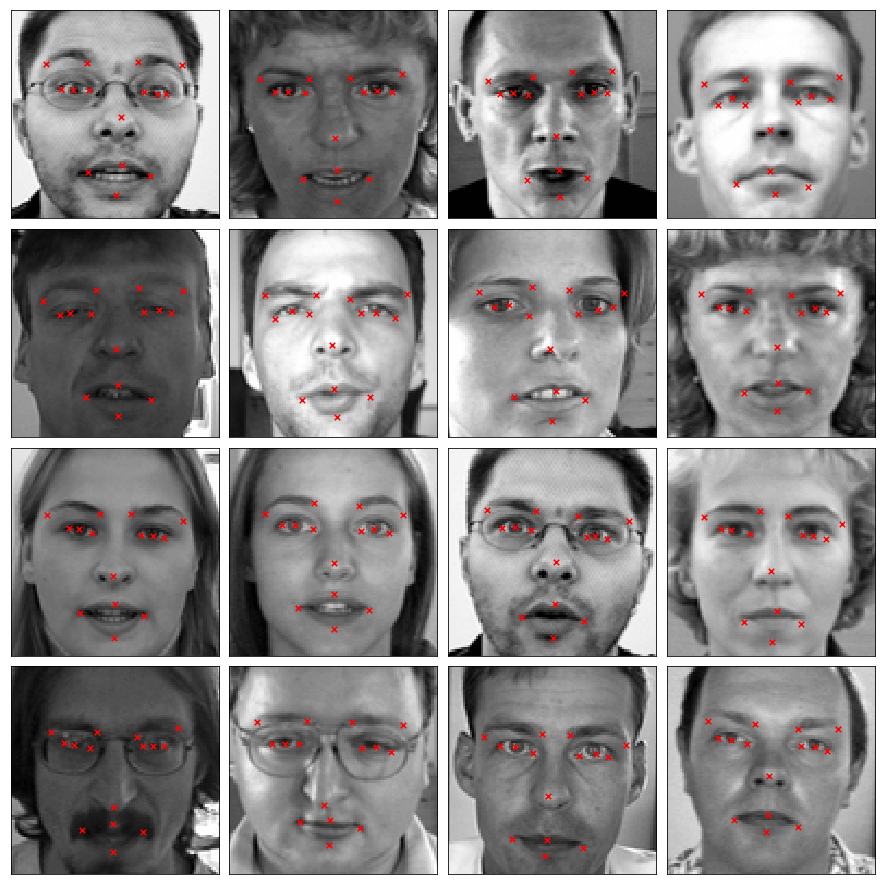

In [14]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], test_prediction[i], ax)

plt.show()